In [1]:
import json
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from plots import upset_plot

# Meta analyses

In [2]:
# Read the JSON file into a Python dictionary
with open('/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/analysed_proteins.json', 'r') as file:
    filter_list_META = json.load(file)

# transform list into pandas df column
for key in filter_list_META.keys():
    for center in filter_list_META[key].keys():
        # use proteins as a colname of a dataframe
        filter_list_META[key][center] = pd.DataFrame(filter_list_META[key][center], columns=['proteins'])

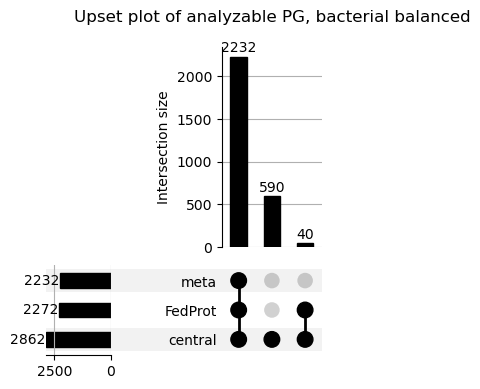

In [8]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['balanced'],
    colname='proteins',
    title='Upset plot of analyzable PG, bacterial balanced\n',
    categories=filter_list_META['balanced'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/balanced/upset_plot_balanced.svg',
)

# imbalanced_plot = upset_plot.generate_upset_plot(
#     filter_list_META['imbalanced'],
#     colname='proteins',
#     title='Upset plot of meta-analysis results, bacterial imbalanced',
#     categories=['lab_A', 'lab_B', 'lab_C', 'lab_D', 'lab_E'],
#     save_plot=True,
#     path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/Meta_DE/upset_plot_imbalanced.svg',
# )